In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import scipy.stats as st
import seaborn.objects as so
import seaborn as sns

In [89]:
palette = ['#003f5c', '#7a5195', '#ef5675', '#ffa600'] #https://matplotlib.org/stable/gallery/color/named_colors.html
marker_size = 8  # Ustalony rozmiar markerów
xlabel = "Distance beetwen AP and STAs [m]"

In [90]:
data = pd.read_csv('tosrts.csv').drop_duplicates()
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,...,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,rateAdaptationManager,scenario,MLOn
0,1,1,1,1,3,52.16100,0.000236,1.418880,52.166900,820143304,...,1121977,1.01766,1.01766,120.963,120.963,126.5890,761575.0,ns3::ThompsonSamplingWifiManager,2,0
1,1,2,1,1,3,52.50770,0.000240,1.420120,51.825000,814199384,...,1121977,1.13794,1.13794,121.000,121.000,127.8860,756714.0,ns3::ThompsonSamplingWifiManager,2,0
2,1,3,1,1,3,5.22667,0.000019,0.173815,103.308000,1624775880,...,1121977,1.00827,1.00827,121.000,121.000,19.9068,184824.0,ns3::ThompsonSamplingWifiManager,2,0
3,1,4,1,1,3,7.56869,0.000024,0.333842,100.758000,1584624624,...,1121977,1.01155,1.01155,121.000,121.000,25.2812,346213.0,ns3::ThompsonSamplingWifiManager,2,0
4,1,1,1,1,3,50.53250,0.000221,1.434090,53.931600,848061392,...,1121977,1.02963,1.02963,121.000,121.000,122.7000,795941.0,ns3::ThompsonSamplingWifiManager,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,208,12,1,1,3,100.00000,0.000000,0.000000,0.000000,0,...,1121977,0.00000,0.00000,0.000,0.000,0.0000,0.0,ns3::ThompsonSamplingWifiManager,8,0
388,208,13,1,1,3,77.49780,0.000541,2.443580,24.528700,385772632,...,1121977,1.00850,1.00850,120.999,120.999,136.4640,616928.0,ns3::ThompsonSamplingWifiManager,8,0
389,208,14,1,1,3,67.75820,0.000450,1.976090,35.173500,552747888,...,1121977,1.10484,1.10484,121.000,121.000,162.8950,714844.0,ns3::ThompsonSamplingWifiManager,8,0
390,208,15,1,1,3,91.54930,0.001655,3.199460,9.247100,144877320,...,1121977,1.44576,1.44576,120.978,120.978,156.9010,303357.0,ns3::ThompsonSamplingWifiManager,8,0


In [91]:
data['tos'] = None
data['BSS'] = None

In [92]:
mask = (data['scenario'] == 1)
data.loc[mask, 'tos'] = 'AC_VO'
mask = (data['scenario'] == 1) & (data['flow'] // 1 == 1)
data.loc[mask, 'BSS'] = 1
mask = (data['scenario'] == 1) & (data['flow'] // 1 == 2)
data.loc[mask, 'BSS'] = 2
mask = (data['scenario'] == 1) & (data['flow'] // 1 == 3)
data.loc[mask, 'BSS'] = 3
mask = (data['scenario'] == 1) & (data['flow'] // 1 == 4)
data.loc[mask, 'BSS'] = 4
data

,rngRun,flow,nStations,distance,linksNumber,loss,jitter,latency,throughput,rxBytes,...,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,rateAdaptationManager,scenario,MLOn,tos,BSS
0,1,1,1,1,3,52.16100,0.000236,1.418880,52.166900,820143304,...,1.01766,120.963,120.963,126.5890,761575.0,ns3::ThompsonSamplingWifiManager,2,0,None,None
1,1,2,1,1,3,52.50770,0.000240,1.420120,51.825000,814199384,...,1.13794,121.000,121.000,127.8860,756714.0,ns3::ThompsonSamplingWifiManager,2,0,None,None
2,1,3,1,1,3,5.22667,0.000019,0.173815,103.308000,1624775880,...,1.00827,121.000,121.000,19.9068,184824.0,ns3::ThompsonSamplingWifiManager,2,0,None,None
3,1,4,1,1,3,7.56869,0.000024,0.333842,100.758000,1584624624,...,1.01155,121.000,121.000,25.2812,346213.0,ns3::ThompsonSamplingWifiManager,2,0,None,None
4,1,1,1,1,3,50.53250,0.000221,1.434090,53.931600,848061392,...,1.02963,121.000,121.000,122.7000,795941.0,ns3::ThompsonSamplingWifiManager,3,0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387,208,12,1,1,3,100.00000,0.000000,0.000000,0.000000,0,...,0.00000,0.000,0.000,0.0000,0.0,ns3::ThompsonSamplingWifiManager,8,0,None,None
388,208,13,1,1,3,77.49780,0.000541,2.443580,24.528700,385772632,...,1.00850,120.999,120.999,136.4640,616928.0,ns3::ThompsonSamplingWifiManager,8,0,None,None
389,208,14,1,1,3,67.75820,0.000450,1.976090,35.173500,552747888,...,1.10484,121.000,121.000,162.8950,714844.0,ns3::ThompsonSamplingWifiManager,8,0,None,None
390,208,15,1,1,3,91.54930,0.001655,3.199460,9.247100,144877320,...,1.44576,120.978,120.978,156.9010,303357.0,ns3::ThompsonSamplingWifiManager,8,0,None,None


In [93]:
mask = (data['scenario'] == 2)
data.loc[mask, 'tos'] = 'AC_VI'
mask = (data['scenario'] == 2) & (data['flow'] // 1 == 1)
data.loc[mask, 'BSS'] = 1
mask = (data['scenario'] == 2) & (data['flow'] // 1 == 2)
data.loc[mask, 'BSS'] = 2
mask = (data['scenario'] == 2) & (data['flow'] // 1 == 3)
data.loc[mask, 'BSS'] = 3
mask = (data['scenario'] == 2) & (data['flow'] // 1 == 4)
data.loc[mask, 'BSS'] = 4

In [94]:
mask = (data['scenario'] == 3)
data.loc[mask, 'tos'] = 'AC_BE'
mask = (data['scenario'] == 3) & (data['flow'] // 1 == 1)
data.loc[mask, 'BSS'] = 1
mask = (data['scenario'] == 3) & (data['flow'] // 1 == 2)
data.loc[mask, 'BSS'] = 2
mask = (data['scenario'] == 3) & (data['flow'] // 1 == 3)
data.loc[mask, 'BSS'] = 3
mask = (data['scenario'] == 3) & (data['flow'] // 1 == 4)
data.loc[mask, 'BSS'] = 4

In [95]:
mask = (data['scenario'] == 4) & (data['flow'] % 2 == 1)
data.loc[mask, 'tos'] = 'AC_VO'
mask = (data['scenario'] == 4) & (data['flow'] % 2 == 0)
data.loc[mask, 'tos'] = 'AC_VI'
mask = (data['scenario'] == 4) & ((data['flow']-1) // 2 == 0)
data.loc[mask, 'BSS'] = 1
mask = (data['scenario'] == 4) & ((data['flow']-1) // 2 == 1)
data.loc[mask, 'BSS'] = 2
mask = (data['scenario'] == 4) & ((data['flow']-1) // 2 == 2)
data.loc[mask, 'BSS'] = 3
mask = (data['scenario'] == 4) & ((data['flow']-1) // 2 == 3)
data.loc[mask, 'BSS'] = 4

In [96]:
mask = (data['scenario'] == 5) & (data['flow'] % 2 == 1)
data.loc[mask, 'tos'] = 'AC_VO'
mask = (data['scenario'] == 5) & (data['flow'] % 2 == 0)
data.loc[mask, 'tos'] = 'AC_BE'
mask = (data['scenario'] == 5) & ((data['flow']-1) // 2 == 0)
data.loc[mask, 'BSS'] = 1
mask = (data['scenario'] == 5) & ((data['flow']-1) // 2 == 1)
data.loc[mask, 'BSS'] = 2
mask = (data['scenario'] == 5) & ((data['flow']-1) // 2 == 2)
data.loc[mask, 'BSS'] = 3
mask = (data['scenario'] == 5) & ((data['flow']-1) // 2 == 3)
data.loc[mask, 'BSS'] = 4

In [97]:
mask = (data['scenario'] == 6) & (data['flow'] % 2 == 1)
data.loc[mask, 'tos'] = 'AC_VI'
mask = (data['scenario'] == 6) & (data['flow'] % 2 == 0)
data.loc[mask, 'tos'] = 'AC_BE'
mask = (data['scenario'] == 6) & ((data['flow']-1) // 2 == 0)
data.loc[mask, 'BSS'] = 1
mask = (data['scenario'] == 6) & ((data['flow']-1) // 2 == 1)
data.loc[mask, 'BSS'] = 2
mask = (data['scenario'] == 6) & ((data['flow']-1) // 2 == 2)
data.loc[mask, 'BSS'] = 3
mask = (data['scenario'] == 6) & ((data['flow']-1) // 2 == 3)
data.loc[mask, 'BSS'] = 4

In [98]:
mask = (data['scenario'] == 7) & (data['flow'] % 3 == 1)
data.loc[mask, 'tos'] = 'AC_VO'
mask = (data['scenario'] == 7) & (data['flow'] % 3 == 2)
data.loc[mask, 'tos'] = 'AC_VI'
mask = (data['scenario'] == 7) & (data['flow'] % 3 == 0)
data.loc[mask, 'tos'] = 'AC_BE'
mask = (data['scenario'] == 7) & ((data['flow']-1) // 3 == 0)
data.loc[mask, 'BSS'] = 1
mask = (data['scenario'] == 7) & ((data['flow']-1) // 3 == 1)
data.loc[mask, 'BSS'] = 2
mask = (data['scenario'] == 7) & ((data['flow']-1) // 3 == 2)
data.loc[mask, 'BSS'] = 3
mask = (data['scenario'] == 7) & ((data['flow']-1) // 3 == 3)
data.loc[mask, 'BSS'] = 4

In [99]:
mask = (data['scenario'] == 8) & (data['flow'] % 4 == 1)
data.loc[mask, 'tos'] = 'AC_VO'
mask = (data['scenario'] == 8) & (data['flow'] % 4 == 2)
data.loc[mask, 'tos'] = 'AC_VI'
mask = (data['scenario'] == 8) & (data['flow'] % 4 == 3)
data.loc[mask, 'tos'] = 'AC_BE'
mask = (data['scenario'] == 8) & (data['flow'] % 4 == 0)
data.loc[mask, 'tos'] = 'AC_BK'
mask = (data['scenario'] == 8) & ((data['flow']-1) // 4 == 0)
data.loc[mask, 'BSS'] = 1
mask = (data['scenario'] == 8) & ((data['flow']-1) // 4 == 1)
data.loc[mask, 'BSS'] = 2
mask = (data['scenario'] == 8) & ((data['flow']-1) // 4 == 2)
data.loc[mask, 'BSS'] = 3
mask = (data['scenario'] == 8) & ((data['flow']-1) // 4 == 3)
data.loc[mask, 'BSS'] = 4

In [100]:
# Flow 0
df0 = (
    data.query("BSS == 1")
        .groupby(['tos', 'scenario', 'distance', 'linksNumber', 'rngRun', 'flow', 'BSS'], as_index=False)
        .sum(numeric_only=True)
        .assign(BSS=1)  # ustawiamy rts na True
)

# Flow 1
df1 = (
    data.query("BSS == 2")
        .groupby(['tos', 'scenario', 'distance', 'linksNumber', 'rngRun', 'flow', 'BSS'], as_index=False)
        .sum(numeric_only=True)
        .assign(BSS=2)  # ustawiamy rts na False
)
df2 = (
    data.query("BSS == 3")
        .groupby(['tos', 'scenario', 'distance', 'linksNumber', 'rngRun', 'flow', 'BSS'], as_index=False)
        .sum(numeric_only=True)
        .assign(BSS=3)  # ustawiamy rts na False
)
df3 = (
    data.query("BSS == 4")
        .groupby(['tos', 'scenario', 'distance', 'linksNumber', 'rngRun', 'flow', 'BSS'], as_index=False)
        .sum(numeric_only=True)
        .assign(BSS=4)  # ustawiamy rts na False
)

In [101]:
df3

,tos,scenario,distance,linksNumber,rngRun,flow,BSS,nStations,loss,jitter,...,txBytes,rxPackets,txPackets,timeFirstRxPacket,timeFirstTxPacket,timeLastRxPacket,timeLastTxPacket,jitterSum,delaySum,MLOn
0,AC_BE,3,1,3,1,4,4,1,6.09531,0.000021,...,1714380856,1053589,1121977,1.01146,1.01146,121.000,121.000,21.9792,234208.0,0
1,AC_BE,3,1,3,2,4,4,1,6.09175,0.000021,...,1714380856,1053629,1121977,1.00616,1.00616,121.000,121.000,21.9700,233032.0,0
2,AC_BE,3,1,3,3,4,4,1,6.10859,0.000021,...,1714380856,1053440,1121977,1.01044,1.01044,121.000,121.000,22.0040,233962.0,0
3,AC_BE,5,1,3,1,8,4,1,86.93610,0.001183,...,1714380856,146574,1121977,1.02645,1.02645,121.000,121.000,173.4210,431021.0,0
4,AC_BE,5,1,3,2,8,4,1,86.54250,0.001171,...,1714380856,150990,1121977,1.03586,1.03586,121.000,121.000,176.8050,443928.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93,AC_VO,8,1,3,203,13,4,1,77.39150,0.000535,...,1714380856,253662,1121977,1.46904,1.46904,121.000,121.000,135.7980,624095.0,0
94,AC_VO,8,1,3,205,13,4,1,77.53890,0.000541,...,1714380856,252008,1121977,1.00724,1.00724,121.000,121.000,136.2820,617500.0,0
95,AC_VO,8,1,3,206,13,4,1,77.56710,0.000543,...,1714380856,251692,1121977,1.08012,1.08012,120.998,120.998,136.5870,617777.0,0
96,AC_VO,8,1,3,207,13,4,1,77.37290,0.000536,...,1714380856,253871,1121977,1.01096,1.01096,120.999,120.999,136.0570,619998.0,0


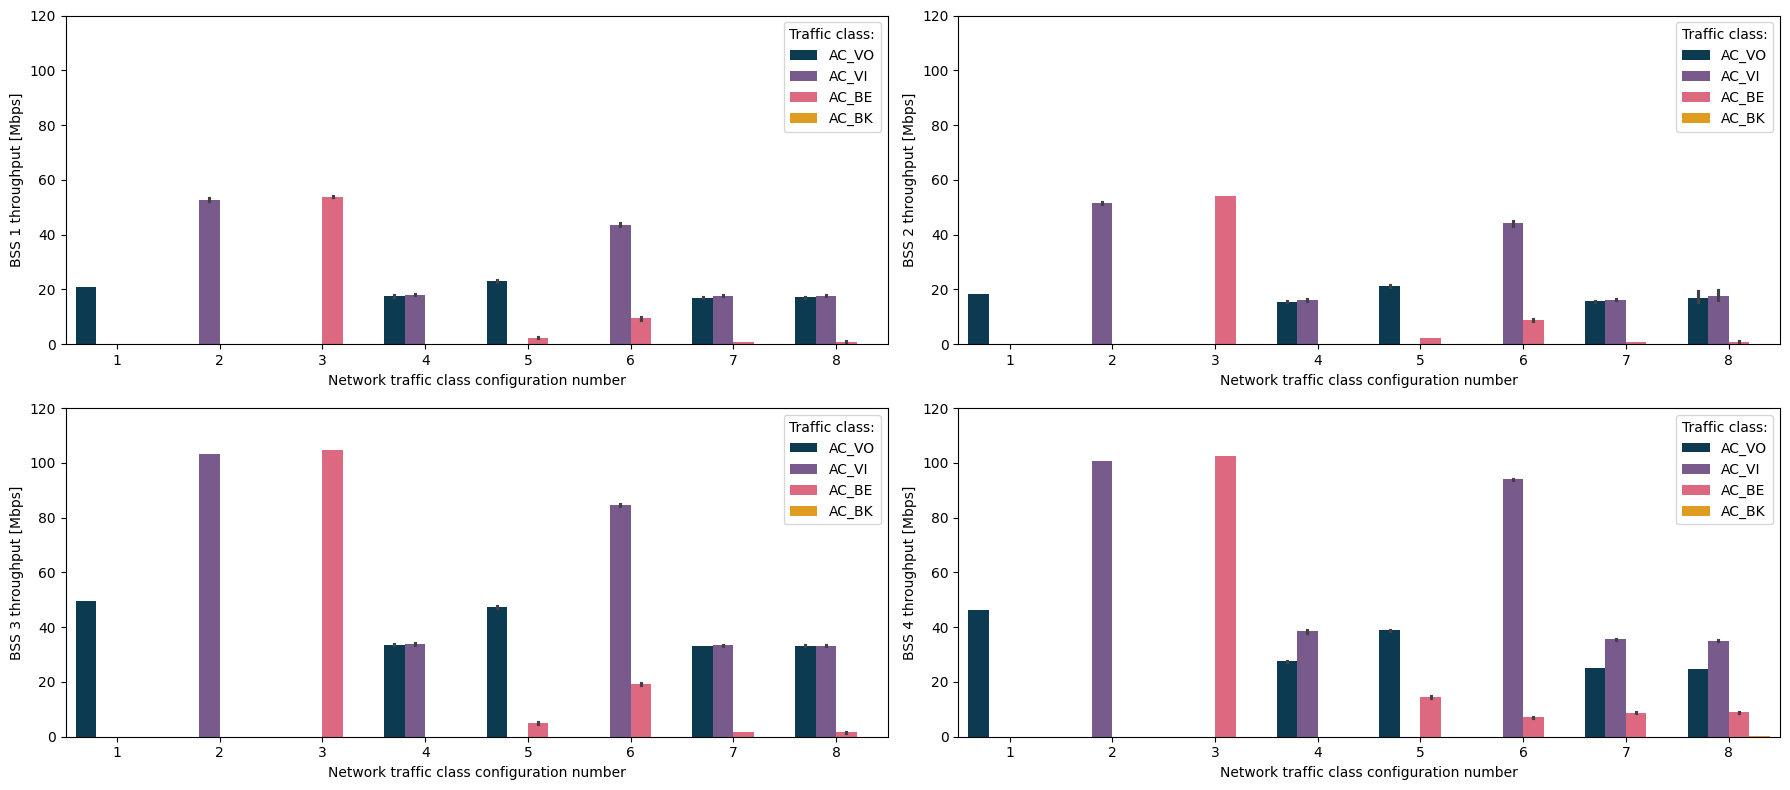

In [102]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8), sharey=False)
axes = axes.flatten()  # <- kluczowa poprawka

xlabel = "Network traffic class configuration number"

plot_data = [
    (df0, 'BSS 1 throughput [Mbps]'),
    (df1, 'BSS 2 throughput [Mbps]'),
    (df2, 'BSS 3 throughput [Mbps]'),
    (df3, 'BSS 4 throughput [Mbps]'),
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(
        data=df,
        x='scenario', y='throughput', hue='tos',
        errorbar='ci', palette=palette, dodge=True,
        ax=axes[i]
    )

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:12],
        ncol=1,
        fontsize='medium',
        title='Traffic class:',
        title_fontsize='medium'
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    axes[i].set_ylim(0, 120)

# ----------- Zapis i wyświetlenie -----------
plt.tight_layout()
plt.savefig('toss_thr_rts.svg', bbox_inches='tight')
plt.show()


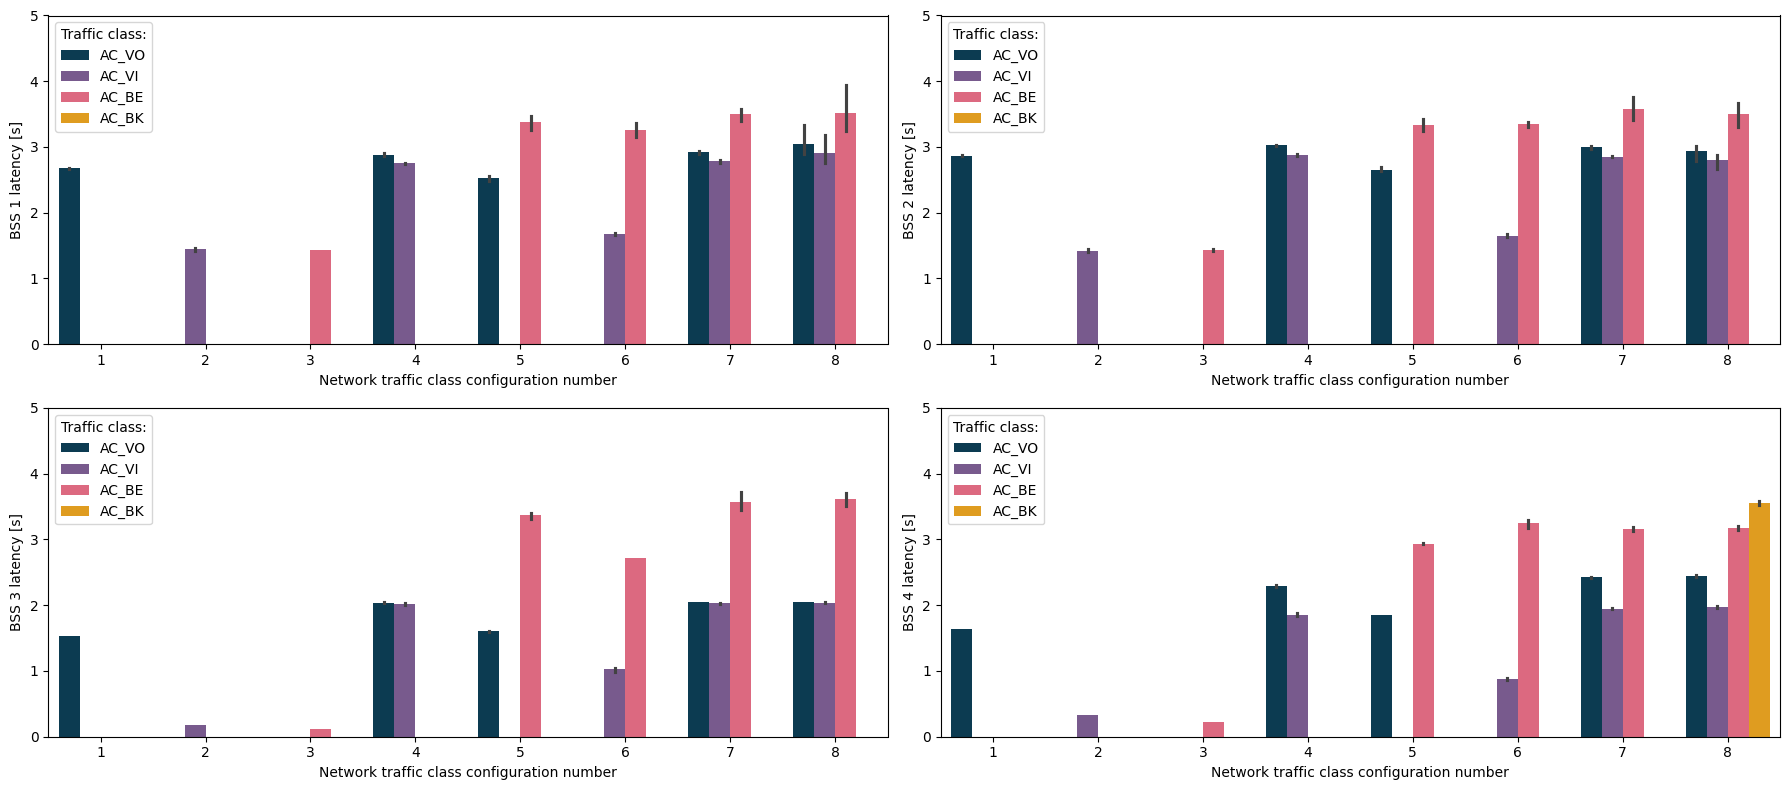

In [103]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8), sharey=False)
axes = axes.flatten()  # <- kluczowa poprawka

xlabel = "Network traffic class configuration number"

plot_data = [
    (df0, 'BSS 1 latency [s]'),
    (df1, 'BSS 2 latency [s]'),
    (df2, 'BSS 3 latency [s]'),
    (df3, 'BSS 4 latency [s]'),
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(
        data=df,
        x='scenario', y='latency', hue='tos',
        errorbar='ci', palette=palette, dodge=True,
        ax=axes[i]
    )

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:12],
        ncol=1,
        fontsize='medium',
        title='Traffic class:',
        title_fontsize='medium'
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    axes[i].set_ylim(0, 5)

# ----------- Zapis i wyświetlenie -----------
plt.tight_layout()
plt.savefig('toss_lat_rts.svg', bbox_inches='tight')
plt.show()


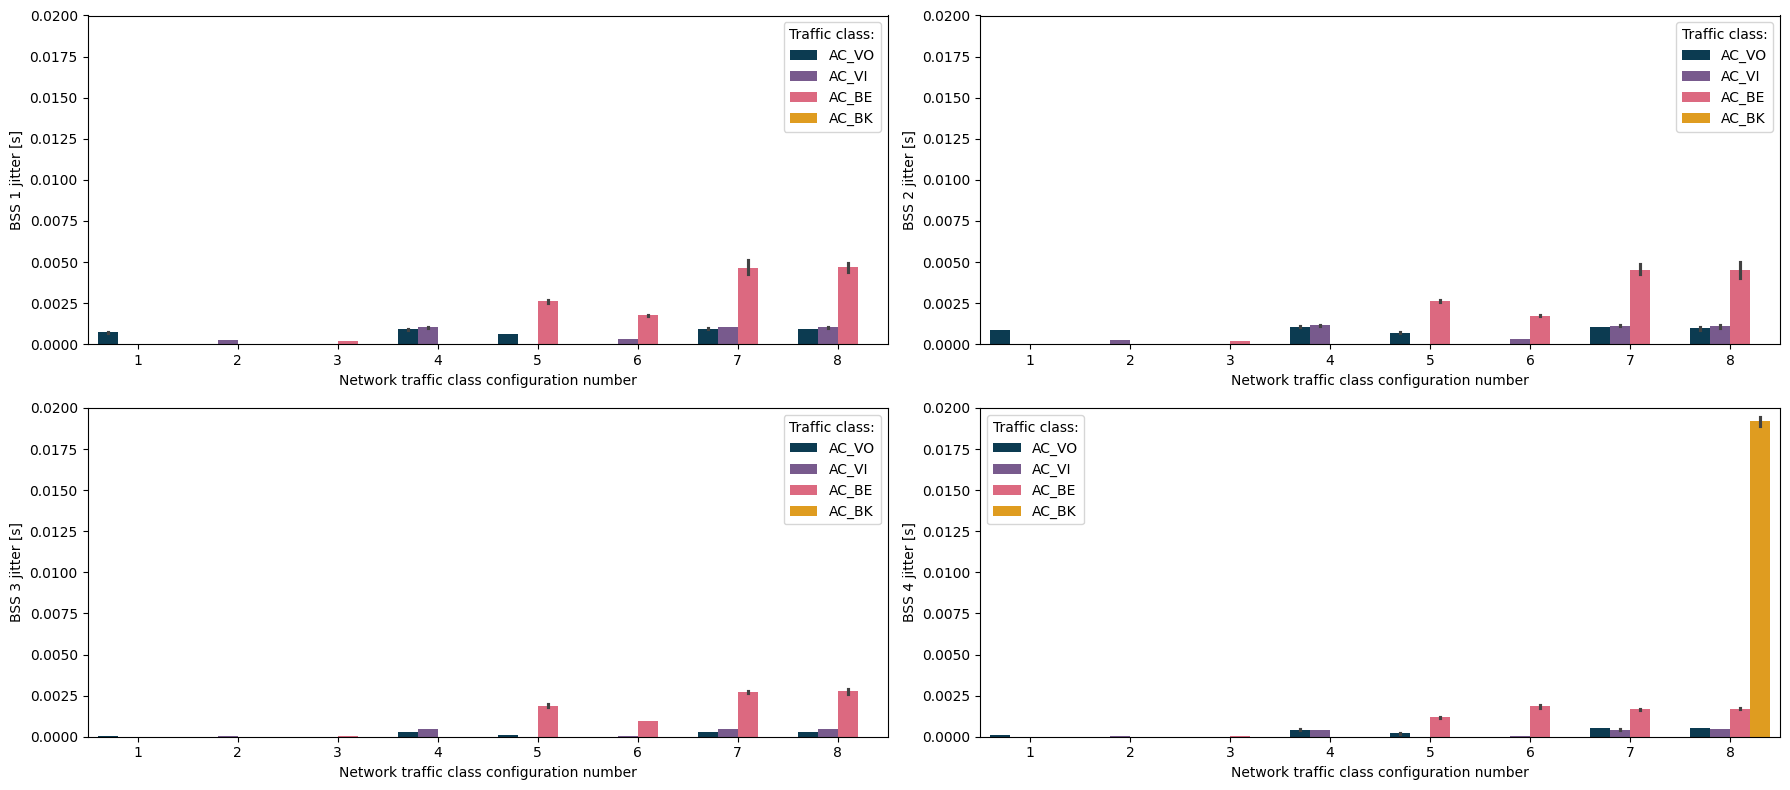

In [104]:
fig, axes = plt.subplots(2, 2, figsize=(18, 8), sharey=False)
axes = axes.flatten()  # <- kluczowa poprawka

xlabel = "Network traffic class configuration number"

plot_data = [
    (df0, 'BSS 1 jitter [s]'),
    (df1, 'BSS 2 jitter [s]'),
    (df2, 'BSS 3 jitter [s]'),
    (df3, 'BSS 4 jitter [s]'),
]

# ----------- Rysowanie wykresów -----------

for i, (df, title) in enumerate(plot_data):
    sns.barplot(
        data=df,
        x='scenario', y='jitter', hue='tos',
        errorbar='ci', palette=palette, dodge=True,
        ax=axes[i]
    )

    axes[i].tick_params(axis='y', which='both', labelleft=True)
    for line in axes[i].get_lines():
        line.set_markersize(marker_size)

    handles, labels = axes[i].get_legend_handles_labels()
    axes[i].legend(
        handles=handles[0:12],
        ncol=1,
        fontsize='medium',
        title='Traffic class:',
        title_fontsize='medium'
    )

    axes[i].set(xlabel=xlabel, ylabel=title)
    axes[i].set_ylim(0, 0.02)

# ----------- Zapis i wyświetlenie -----------
plt.tight_layout()
plt.savefig('toss_jit_rts.svg', bbox_inches='tight')
plt.show()
